In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
iris = pd.read_csv('Iris.csv')
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.shape

(150, 6)

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
duplicate_rows = iris[iris.duplicated(subset=iris.columns.tolist())]
print(duplicate_rows.sum())

Id                 0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species            0
dtype: object


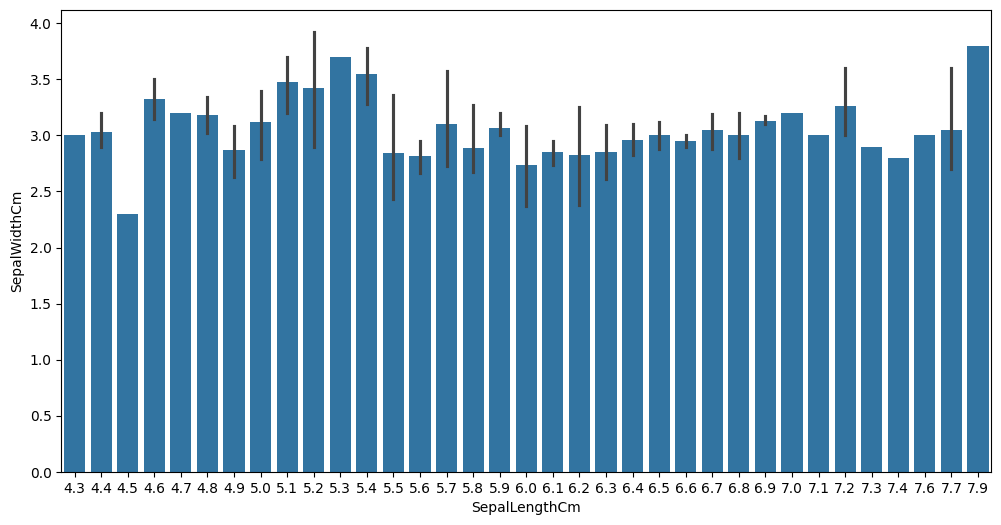

In [7]:
# Scatter plot of sepal length vs sepal width
plt.figure(figsize=(12,6))
sns.barplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'])
plt.show()

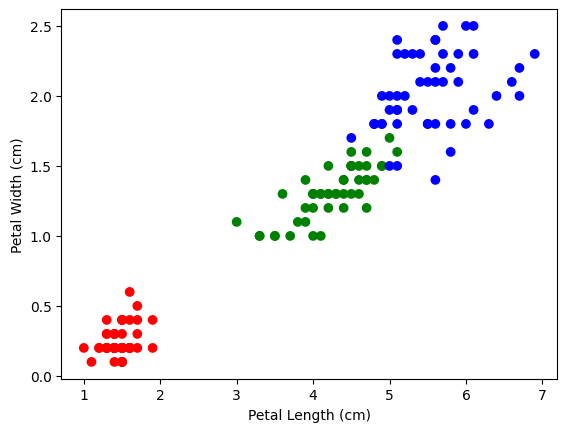

In [8]:
# Scatter plot of petal length vs petal width, colored by species
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c=iris['Species'].map(colors))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

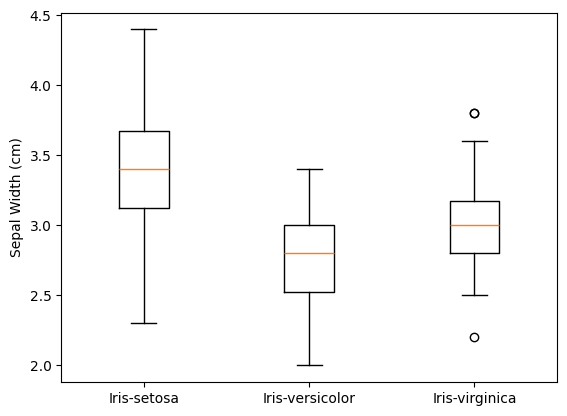

In [9]:
# Box plot of sepal width by species
plt.boxplot([iris[iris['Species']=='Iris-setosa']['SepalWidthCm'],
             iris[iris['Species']=='Iris-versicolor']['SepalWidthCm'],
             iris[iris['Species']=='Iris-virginica']['SepalWidthCm']],
            labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('Sepal Width (cm)')
plt.show()

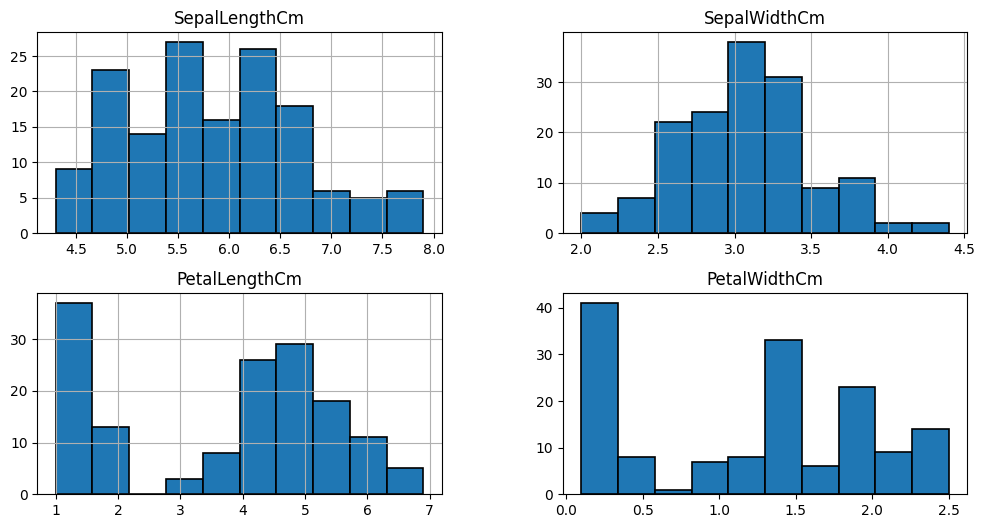

In [19]:
selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris[selected_columns].hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)
plt.show()


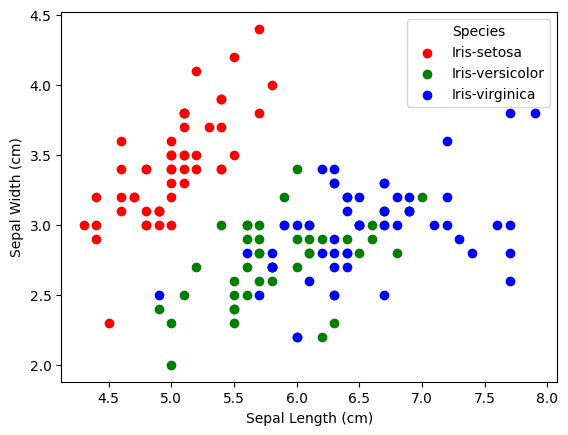

In [26]:
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
legend_dict = {}
for species, color in colors.items():
    data = iris[iris['Species'] == species]
    scatter = plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=color, label=species)
    legend_dict[species] = scatter

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

legend = plt.legend(handles=[legend_dict[species] for species in colors.keys()], title='Species')
plt.show()


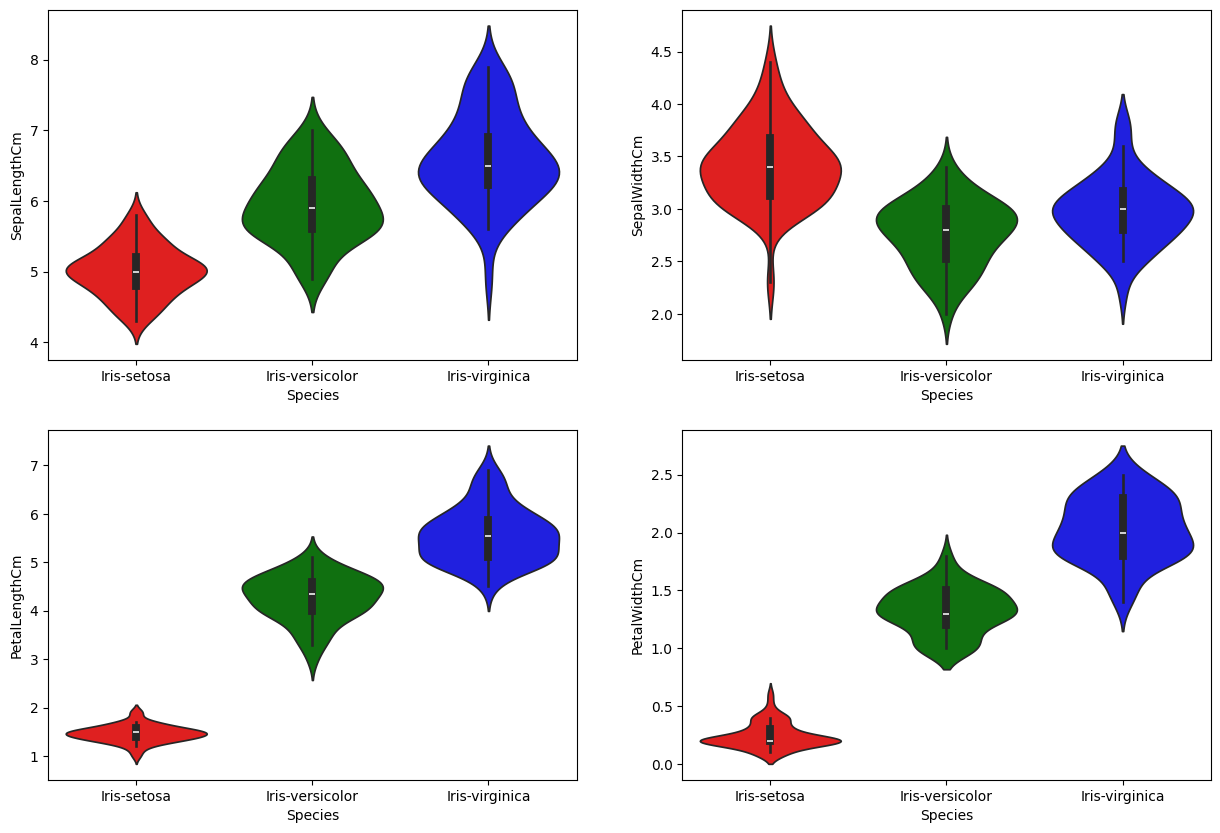

In [29]:
palette = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

# Create a 2x2 grid of subplots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris, hue='Species', palette=palette)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris, hue='Species', palette=palette)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, hue='Species', palette=palette)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris, hue='Species', palette=palette)

plt.show()


Import Important Libraries

In [31]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

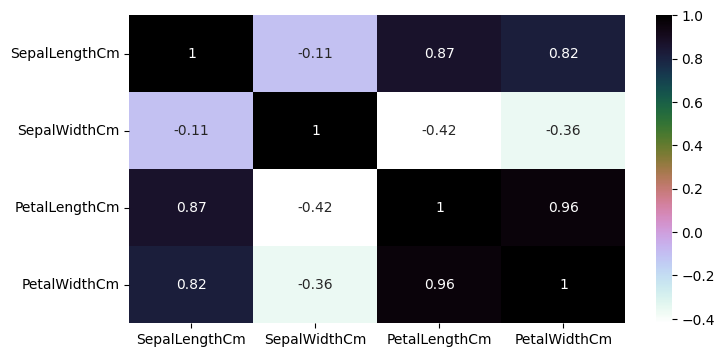

In [36]:
# Exclude the non-numeric 'Species' column
numeric_columns = iris.drop(columns=['Id', 'Species'])
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='cubehelix_r')
plt.show()


Split the Data Set Into Training and Testing

In [46]:
train, test = train_test_split(iris, test_size=0.3) 
print(train.shape)
print(test.shape)


(105, 6)
(45, 6)


In [47]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
train_y = train.Species 

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species 

In [48]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
146,6.3,2.5,5.0,1.9
83,6.0,2.7,5.1,1.6
148,6.2,3.4,5.4,2.3
82,5.8,2.7,3.9,1.2
63,6.1,2.9,4.7,1.4


In [49]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
127,6.1,3.0,4.9,1.8
67,5.8,2.7,4.1,1.0
72,6.3,2.5,4.9,1.5
141,6.9,3.1,5.1,2.3


In [50]:
train_y.head()

146     Iris-virginica
83     Iris-versicolor
148     Iris-virginica
82     Iris-versicolor
63     Iris-versicolor
Name: Species, dtype: object

Support Vector Machine

In [51]:
model = svm.SVC() 
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_y))

0.9333333333333333


Logistic Regression

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_y))

0.9555555555555556


Decision Tree Algorithm

In [55]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print( metrics.accuracy_score(prediction, test_y))

0.9555555555555556
